<a href="https://colab.research.google.com/github/ActionPace/DeepLearningTests/blob/master/KerasCookBookCh04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Inaccuracy of traditional neural networks when images are translated

In [0]:
from keras.datasets import mnist
from keras.layers import Flatten, Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
from keras.utils.np_utils import to_categorical
%matplotlib inline
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
X_train1 = X_train[y_train==1]

In [0]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0],num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0],num_pixels).astype('float32')
X_train = X_train / 255
X_test = X_test / 255

In [0]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_train.shape[1]

In [0]:
model = Sequential()
model.add(Dense(1000, input_dim=num_pixels, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=5, batch_size=1024, verbose=1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.4749 - acc: 0.8715 - val_loss: 0.2302 - val_acc: 0.9351
Epoch 2/5
60000/60000 [==============================] - 1s 11us/step - loss: 0.2000 - acc: 0.9436 - val_loss: 0.1653 - val_acc: 0.9521
Epoch 3/5
60000/60000 [==============================] - 1s 11us/step - loss: 0.1419 - acc: 0.9604 - val_loss: 0.1291 - val_acc: 0.9622
Epoch 4/5
60000/60000 [==============================] - 1s 11us/step - loss: 0.1097 - acc: 0.9697 - val_loss: 0.1040 - val_acc: 0.9688
Epoch 5/5
60000/60000 [==============================] - 1s 12us/step - loss: 0.0859 - acc: 0.9765 - val_loss: 0.0934 - val_acc: 0.9716


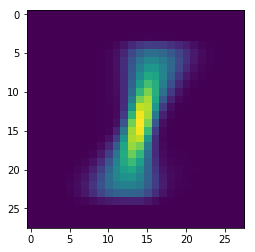

In [0]:
pic=np.zeros((28,28))
pic2=np.copy(pic)
for i in range(X_train1.shape[0]):
    pic2=X_train1[i,:,:]
    pic=pic+pic2
pic=(pic/X_train1.shape[0])
plt.imshow(pic)

## Problems with traditional NN

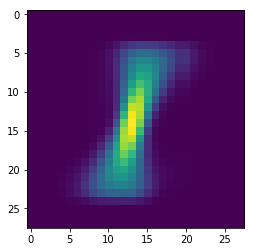

In [0]:
for i in range(pic.shape[0]):
     if i<20:
         pic[:,i]=pic[:,i+1]
     plt.imshow(pic)

In [0]:
model.predict(pic.reshape(1,784)/255)

array([[0.00409794, 0.5425521 , 0.0094619 , 0.0032314 , 0.00173705,
        0.01627959, 0.03301599, 0.00065722, 0.3880873 , 0.0008795 ]],
      dtype=float32)

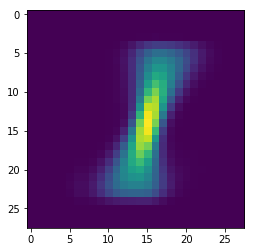

In [0]:
pic=np.zeros((28,28))
pic2=np.copy(pic)
for i in range(X_train1.shape[0]):
    pic2=X_train1[i,:,:]
    pic=pic+pic2
pic=(pic/X_train1.shape[0])
pic2=np.copy(pic)
for i in range(pic.shape[0]):
    if ((i>6) and (i<26)):
        pic[:,i]=pic2[:,(i-1)]
plt.imshow(pic)

In [0]:
model.predict(pic.reshape(1,784)/255)

array([[1.4896161e-04, 8.8503128e-01, 5.4015936e-03, 3.2252930e-02,
        9.9224821e-03, 1.9740251e-04, 1.7274231e-04, 2.5170138e-02,
        3.4312900e-02, 7.3895627e-03]], dtype=float32)

## Building a CNN from scratch using Python

In [0]:
import numpy as np
X_train=np.array([[[1,2,3,4],[2,3,4,5],[5,6,7,8],[1,3,4,5]],
[[-1,2,3,-4],[2,-3,4,5],[-5,6,-7,8],[-1,-3,-4,-5]]])
y_train=np.array([0,1])

In [0]:
X_train = X_train / 8

In [0]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[1],1 ).astype('float32')

In [0]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
model = Sequential()

In [0]:
model.add(Conv2D(1, (3,3), input_shape=(4,4,1),activation='relu'))

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2))) 

In [0]:
model.add(Flatten())

In [0]:
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 2, 2, 1)           10        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 1)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2         
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 2s 1s/step - loss: 0.6256 - acc: 0.5000
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 0.6243 - acc: 0.5000
Epoch 3/500
2/2 [==============================] - 0s 4ms/step - loss: 0.6230 - acc: 0.5000
Epoch 4/500
2/2 [==============================] - 0s 4ms/step - loss: 0.6216 - acc: 0.5000
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 0.6203 - acc: 0.5000
Epoch 6/500
2/2 [==============================] - 0s 4ms/step - loss: 0.6190 - acc: 0.5000
Epoch 7/500
2/2 [==============================] - 0s 4ms/step - loss: 0.6176 - acc: 0.5000
Epoch 8/500
2/2 [==============================] - 0s 4ms/step - loss: 0.6163 - acc: 0.5000
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 0.6150 - acc: 0.5000
Epoch 10/500
2/2 [==============================] - 0s 4ms/step - loss: 0.6137 - acc: 0.5000
Epoch 11/500
2/2 [==============================] - 0s 3ms/step - loss: 0.6123 -

## Validating the CNN output

In [0]:
model.weights

[<tf.Variable 'conv2d_1/kernel:0' shape=(3, 3, 1, 1) dtype=float32_ref>,
 <tf.Variable 'conv2d_1/bias:0' shape=(1,) dtype=float32_ref>,
 <tf.Variable 'dense_3/kernel:0' shape=(1, 1) dtype=float32_ref>,
 <tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32_ref>]

In [0]:
model.get_weights()

[array([[[[ 0.58344984]],
 
         [[-0.08272272]],
 
         [[ 0.49108955]]],
 
 
        [[[ 0.71794784]],
 
         [[ 0.30358872]],
 
         [[ 0.43676567]]],
 
 
        [[[-0.06266361]],
 
         [[ 0.41223913]],
 
         [[ 0.58951247]]]], dtype=float32),
 array([-0.20776977], dtype=float32),
 array([[-1.226705]], dtype=float32),
 array([0.5352338], dtype=float32)]

In [0]:
model.predict(X_train[0].reshape(1,4,4,1))

array([[0.11896823]], dtype=float32)

In [0]:
sumprod = []
for i in range(X_train[0].shape[0]-model.get_weights()[0].shape[0]+1):
     for j in range(X_train[0].shape[0]-model.get_weights()[0].shape[0]+1):
         img_subset = np.array(X_train[0,i:(i+3),j:(j+3),0])
         filter = model.get_weights()[0].reshape(3,3)
         val = np.sum(img_subset*filter) + model.get_weights()[1]
         sumprod.append(val)

In [0]:
sumprod= np.array(sumprod).reshape(2,2,1)

In [0]:
sumprod = np.where(sumprod>0,sumprod,0)

In [0]:
pooling_layer_output = np.max(sumprod)

In [0]:
intermediate_output_value = pooling_layer_output*model.get_weights()[2]+model.get_weights()[3]

In [0]:
1/(1+np.exp(-intermediate_output_value))

array([[0.11896818]], dtype=float32)

## CNNs to improve accuracy in the case of image translation

The strategy that we will be adopting to build a CNN model is as follows:

* Given that the input shape is 28 x 28 x 1, the filters shall be 3 x 3 x 1 in size:
    * Note that the size of filter can change, however the number of channels cannot change
* Let's initialize 10 filters
* We will perform pooling on top of the output obtained in the previous step of convolving 10 filters over the input image:
    * This would result in halving the image's dimension
* We will flatten the output obtained while pooling
* The flattened layer will be connected to another hidden layer that has 1,000 units
* Finally, we connect the hidden layer to the output layer where there are 10 possible classes (as there are 10 digits, from 0 to 9)

Once we build the model, we will translate the average 1 image by 1 pixel and then test the CNN model's prediction on the translated image. 

Note that the feedforward NN architecture was not able to predict the right class in this scenario.

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[1],1 ).astype('float32')
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[1],1).astype('float32')

X_train = X_train / 255
X_test = X_test / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]

In [0]:
model = Sequential()
model.add(Conv2D(10, (3,3), input_shape=(28, 28,1),
activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 10)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1690)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              1691000   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                10010     
Total params: 1,701,110
Trainable params: 1,701,110
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 10)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1690)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              1691000   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                10010     
Total params: 1,701,110
Trainable params: 1,701,110
Non-trainable params: 0
_________________________________________________________________


We have a total of 100 parameters in the convolution layer as there are 10 of the 3 x 3 x 1 filters, resulting in a total of 90 weight parameters. 

Additionally, 10 bias terms (1 for each filter) add up to form a total of 100 parameters in the convolution layer.

Note that max pooling does not have any parameters, as it is about extracting the maximum value within a patch that is 2 x 2 in size.


In [0]:
model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=5, batch_size=1024, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 33us/step - loss: 0.5003 - acc: 0.8672 - val_loss: 0.2020 - val_acc: 0.9408
Epoch 2/5
60000/60000 [==============================] - 1s 22us/step - loss: 0.1635 - acc: 0.9526 - val_loss: 0.1228 - val_acc: 0.9657
Epoch 3/5
60000/60000 [==============================] - 1s 22us/step - loss: 0.1032 - acc: 0.9707 - val_loss: 0.0880 - val_acc: 0.9728
Epoch 4/5
60000/60000 [==============================] - 1s 22us/step - loss: 0.0746 - acc: 0.9789 - val_loss: 0.0667 - val_acc: 0.9798
Epoch 5/5
60000/60000 [==============================] - 1s 22us/step - loss: 0.0588 - acc: 0.9837 - val_loss: 0.0594 - val_acc: 0.9807


## Gender classification using CNNs

In this section, let's formulate our strategy of how we will solve this problem:

* We will collect a dataset of images and label each image based on the gender of person present in image
* We'll work on only 2,000 images, as the data fetching process takes a considerably long time for our dataset (as we are manually downloading images from a website in this case study)
* Additionally, we'll ensure that there is equal representation of male and female images in the dataset
* Once the dataset is in place, we will reshape the images into the same size so that they can be fed into a CNN model
* We will build the CNN model where the output layer has as many classes as the number of labels two
* Given that this is a case of predicting one out of the two possible labels in the dataset, we will minimize the binary cross-entropy loss

In [0]:
!wget https://d1p17r2m4rzlbo.cloudfront.net/wp-content/uploads/2017/04/a943287.csv

--2019-04-15 22:18:45--  https://d1p17r2m4rzlbo.cloudfront.net/wp-content/uploads/2017/04/a943287.csv
Resolving d1p17r2m4rzlbo.cloudfront.net (d1p17r2m4rzlbo.cloudfront.net)... 13.35.115.48, 13.35.115.24, 13.35.115.27, ...
Connecting to d1p17r2m4rzlbo.cloudfront.net (d1p17r2m4rzlbo.cloudfront.net)|13.35.115.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7847932 (7.5M) [application/octet-stream]
Saving to: ‘a943287.csv’

a943287.csv         100%[===================>]   7.48M  28.4MB/s    in 0.3s    

2019-04-15 22:18:46 (28.4 MB/s) - ‘a943287.csv’ saved [7847932/7847932]



In [0]:
import pandas as pd, numpy as np
from skimage import io
# Location of file is /content/a943287.csv
# be sure to change to location of downloaded file on your machine
data = pd.read_csv('./a943287.csv')
data.head() 

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,please_select_the_gender_of_the_person_in_the_picture,please_select_the_gender_of_the_person_in_the_picture:confidence,image_url,please_select_the_gender_of_the_person_in_the_picture_gold,user_id
0,1023132475,False,finalized,1,8/19/2016 17:00:25,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/40...,NaN,40
1,1023132476,False,finalized,1,8/19/2016 17:00:48,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/42...,NaN,42
2,1023132477,False,finalized,1,8/19/2016 17:01:43,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/44...,NaN,44
3,1023132478,False,finalized,1,8/19/2016 17:01:04,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/47...,NaN,47
4,1023132479,False,finalized,1,8/19/2016 17:00:48,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/50...,NaN,50


Fetch 1,000 male images and 1,000 female images from the URL links provided in the dataset:

In [0]:
data_male = data[data['please_select_the_gender_of_the_person_in_the_picture']=="male"].reset_index(drop='index')
data_female = data[data['please_select_the_gender_of_the_person_in_the_picture']=="female"].reset_index(drop='index')
final_data = pd.concat([data_male[:1000],data_female[:1000]],axis=0).reset_index(drop='index')

In [0]:
#x = []
#y = []
#for i in range(final_data.shape[0]):
#     try:
#         image = io.imread(final_data.loc[i]['image_url'])
#         if(image.shape==(300,300,3)):
#             x.append(image)
#             y.append(final_data.loc[i]['please_select_the_gender_of_the_person_in_the_picture'])
#     except:
#         continue

In [0]:
!wget https://s3.amazonaws.com/machinelearningfiles/genderx.pkl

--2019-04-15 22:19:07--  https://s3.amazonaws.com/machinelearningfiles/genderx.pkl
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.84.181
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.84.181|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 474500089 (453M) [application/x-www-form-urlencoded]
Saving to: ‘genderx.pkl’

genderx.pkl         100%[===================>] 452.52M  49.4MB/s    in 8.5s    

2019-04-15 22:19:16 (53.0 MB/s) - ‘genderx.pkl’ saved [474500089/474500089]



In [0]:
!wget https://s3.amazonaws.com/machinelearningfiles/gendery.pkl

--2019-04-15 22:19:17--  https://s3.amazonaws.com/machinelearningfiles/gendery.pkl
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.96.21
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.96.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3544 (3.5K) [binary/octet-stream]
Saving to: ‘gendery.pkl’

gendery.pkl         100%[===================>]   3.46K  --.-KB/s    in 0s      

2019-04-15 22:19:17 (198 MB/s) - ‘gendery.pkl’ saved [3544/3544]



In [0]:
import pickle

In [0]:
with open('genderx.pkl', 'rb') as f:
...   x = pickle.load(f)

In [0]:
with open('gendery.pkl', 'rb') as f:
...   y = pickle.load(f)

In the preceding code, final_data contains URL links for 1,000 male images and 1,000 female images. 

Read the URL links and fetch the images corresponding to the URL links. Ensure that all images are 300 × 300 × 3 in shape (as the majority of the images in his dataset have that shape) and also that we take care of any forbidden to access issues:

Create the input and output arrays:

In [0]:
import cv2
import numpy as np
x2 = []
y2 = []
for i in range(len(x)):
      img = cv2.cvtColor(x[i], cv2.COLOR_BGR2GRAY)
      img2 = cv2.resize(img,(50,50))
      x2.append(img2)
      img_label = np.where(y[i]=="male",1,0)
      y2.append(img_label)

In the preceding step, we have converted the color image into a grayscale image as the color of the image is likely to add additional information (we'll validate this hypothesis in Chapter 5, Transfer Learning).

Additionally, we have resized our images to a lower size (50 x 50 x 1) in shape. The result of this is as follows:

Finally, we converted the output into a one-hot-encoded version.

Create train and test datasets. First, we convert the input and output lists into arrays and then shape the input so that it is in a shape that can be be provided as input to the CNN:

In [0]:
x2 = np.array(x2)
x2 = x2.reshape(x2.shape[0],x2.shape[1],x2.shape[2],1)
Y = np.array(y2)

In [0]:
X = np.array(x2)/255
Y = np.array(y2)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1581, 50, 50, 1) (176, 50, 50, 1) (1581,) (176,)


In [0]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',input_shape=(50,50,1)))
model.add(MaxPooling2D(pool_size=(5, 5)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 256)         295168    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 2, 2, 512)         1180160   
__________

Note that the number of channels in the output of the convolution layer would be equal to the number of filters specified in that layer. 

Additionally, we have performed a slightly more aggressive pooling on the first convolution layer's output.

Now, we'll compile the model to minimize binary cross entropy loss (as the output has only two classes) as follows:

In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
history = model.fit(X_train, y_train, batch_size=32, epochs=50,verbose=1,validation_data = (X_test, y_test))

Train on 1581 samples, validate on 176 samples
Epoch 1/50
1581/1581 [==============================] - 2s 1ms/step - loss: 0.6942 - acc: 0.5136 - val_loss: 0.6901 - val_acc: 0.5227
Epoch 2/50
1581/1581 [==============================] - 1s 589us/step - loss: 0.6480 - acc: 0.6262 - val_loss: 0.6397 - val_acc: 0.6080
Epoch 3/50
1581/1581 [==============================] - 1s 591us/step - loss: 0.5783 - acc: 0.6996 - val_loss: 0.5909 - val_acc: 0.6761
Epoch 4/50
1581/1581 [==============================] - 1s 614us/step - loss: 0.5043 - acc: 0.7533 - val_loss: 0.5727 - val_acc: 0.6932
Epoch 5/50
1581/1581 [==============================] - 1s 593us/step - loss: 0.4397 - acc: 0.8014 - val_loss: 0.5662 - val_acc: 0.6932
Epoch 6/50
1581/1581 [==============================] - 1s 586us/step - loss: 0.3721 - acc: 0.8336 - val_loss: 0.5279 - val_acc: 0.7330
Epoch 7/50
1581/1581 [==============================] - 1s 577us/step - loss: 0.3063 - acc: 0.8729 - val_loss: 0.5543 - val_acc: 0.7102
Epo

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


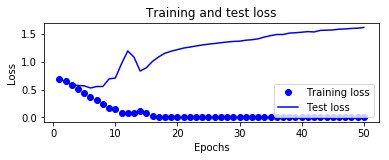

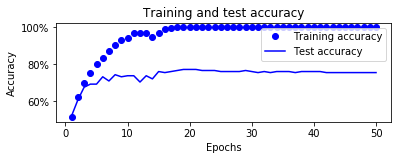

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['acc'], 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.legend()
plt.grid('off')
plt.show()


Once we fit the model, we can see that the preceding code results in an accuracy of ~80% in predicting the right gender in an image.

## Data augmentation to improve network accuracy

The accuracy of classification can be further improved by:

* Working on more images
* Working on bigger images (rather than 50 x 50 images) that are used to train a larger network
* Leveraging transfer learning (which will be discussed in Chapter 5, Transfer Learning)
* Avoiding overfitting using regularization and dropout

### Data augmentation to improve network accuracy

It is difficult to classify images accurately if they are translated from their original location. 

However, given an image, the label of the image will remain the same, even if we translate, rotate, or scale the image. 

Data augmentation is a way to create more images from the given set of images, that is, by rotating, translating, or scaling them and mapping them to the label of the original image.

An intuition for this is as follows: an image of a person will still be corresponding to the person, even if the image is rotated slightly or the person in the image is moved from the middle of the image to far right of the image.

Hence, we should be in a position to create more training data by rotating and translating the original images, where we already know the labels that correspond to each image.

In this recipe, we will be working on the CIFAR-10 dataset, which contains images of objects of 10 different classes.

The strategy that we'll use is as follows:

* Download the CIFAR-10 dataset
* Preprocess the dataset
* Scale the input values
* One-hot-encode the output classes
* Build a deep CNN with multiple convolution and pooling layers
* Compile and fit the model to test its accuracy on the test dataset
* Generate random translations of the original set of images in the training dataset
* Fit the same model architecture that was built in the previous step on the total images (generated images, plus the original images)
* Check the accuracy of the model on the test dataset

We will be implementing data augmentation using the ImageDataGenerator method in the keras.preprocessing.image package.

To understand the benefits of data augmentation, let's go through an example of calculating the accuracy on the CIFAR-10 dataset with data augmentation and without data augmentation (the code file is available as Data_augmentation_to_improve_network_accuracy.ipynb in GitHub).

### Model accuracy without data augmentation

Let's calculate the accuracy without data augmentation in the following steps:

Import the packages and data:

In [0]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras import regularizers

from keras.datasets import cifar10
(X_train, y_train), (X_val, y_val) = cifar10.load_data()

170500096/170498071 [==============================] - 10s 0us/step


In [0]:
X_train = X_train.astype('float32')/255.
X_val = X_val.astype('float32')/255.

n_classes = 10
y_train = np_utils.to_categorical(y_train, n_classes)
y_val = np_utils.to_categorical(y_val, n_classes)

In [0]:
weight_decay = 1e-4

In [0]:
input_shape = X_train[0].shape

model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2)) 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3)) 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4)) 
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
from keras.optimizers import Adam
adam = Adam(lr = 0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam,metrics=['accuracy'])

We have a higher learning rate only so that the model converges faster in fewer epochs. 

This enables a faster comparison of the non-data augmentation scenario with the data augmentation scenario. 

Ideally, we would let the model run for a greater number of epochs with a lesser learning rate.

In [0]:
model.fit(X_train, y_train, batch_size=32,epochs=10, verbose=1, validation_data=(X_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 55s 1ms/step - loss: 2.5575 - acc: 0.3453 - val_loss: 2.4900 - val_acc: 0.3397
Epoch 2/10
50000/50000 [==============================] - 50s 1ms/step - loss: 2.0359 - acc: 0.4435 - val_loss: 1.6884 - val_acc: 0.5120
Epoch 3/10
50000/50000 [==============================] - 54s 1ms/step - loss: 1.5917 - acc: 0.5464 - val_loss: 1.4408 - val_acc: 0.5962
Epoch 4/10
50000/50000 [==============================] - 54s 1ms/step - loss: 1.4901 - acc: 0.5969 - val_loss: 1.6460 - val_acc: 0.5563
Epoch 5/10
50000/50000 [==============================] - 54s 1ms/step - loss: 1.4157 - acc: 0.6147 - val_loss: 1.6135 - val_acc: 0.5476
Epoch 6/10
50000/50000 [==============================] - 54s 1ms/step - loss: 1.3646 - acc: 0.6323 - val_loss: 1.3009 - val_acc: 0.6466
Epoch 7/10
50000/50000 [==============================] - 54s 1ms/step - loss: 1.3224 - acc: 0.6417 - val_loss: 1.3758 - val_acc

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


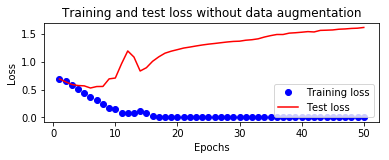

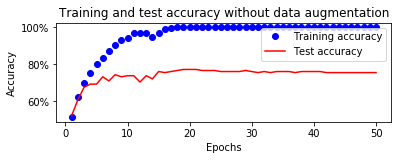

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)

import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Test loss')
plt.title('Training and test loss without data augmentation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['acc'], 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Test accuracy')
plt.title('Training and test accuracy without data augmentation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

The accuracy of this network is ~66%:

## Model accuracy with data augmentation

In the following code, we will implement data augmentation:

Use the ImageDataGenerator method in the keras.preprocessing.image package:

In [0]:
from keras.preprocessing.image import ImageDataGenerator 
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0,
    height_shift_range=0,
    fill_mode = 'nearest')

datagen.fit(X_train)

In the following code, we will implement data augmentation:

Use the ImageDataGenerator method in the keras.preprocessing.image package:

Note that the images are tilted slightly when compared to the previous set of images.

Now, we will pass our total data through the data generator, as follows:

In [0]:
batch_size = 32
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2)) 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3)) 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4)) 
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
from keras.optimizers import Adam
adam = Adam(lr = 0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

Note that we are rebuilding the model so that the weights are initialized one more time as we are comparing between a data augmentation and non-data augmentation scenario:

In [0]:
model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),steps_per_epoch=X_train.shape[0] // batch_size, epochs=10,validation_data=(X_val,y_val))

Epoch 1/10
1562/1562 [==============================] - 58s 37ms/step - loss: 2.3872 - acc: 0.3608 - val_loss: 2.1546 - val_acc: 0.3496
Epoch 2/10
1562/1562 [==============================] - 55s 35ms/step - loss: 1.6836 - acc: 0.4906 - val_loss: 2.1589 - val_acc: 0.4266
Epoch 3/10
1562/1562 [==============================] - 55s 35ms/step - loss: 1.6240 - acc: 0.5526 - val_loss: 1.6087 - val_acc: 0.5742
Epoch 4/10
1562/1562 [==============================] - 55s 35ms/step - loss: 1.5507 - acc: 0.5782 - val_loss: 1.7925 - val_acc: 0.5436
Epoch 5/10
1562/1562 [==============================] - 55s 35ms/step - loss: 1.4992 - acc: 0.5909 - val_loss: 1.4053 - val_acc: 0.6377
Epoch 6/10
1562/1562 [==============================] - 54s 35ms/step - loss: 1.4550 - acc: 0.6010 - val_loss: 1.3988 - val_acc: 0.6309
Epoch 7/10
1562/1562 [==============================] - 55s 35ms/step - loss: 1.4331 - acc: 0.6066 - val_loss: 1.3315 - val_acc: 0.6502
Epoch 8/10
1562/1562 [==========================

Note that the fit_generator method fits the model while generating new images.

Additionally, datagen.flow specifies that new training data points need to be generated per the datagen strategy we initialized in step 1. 

Along with this, we also specify the number of steps per epoch as the ratio of the total number of data points over the batch size:

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


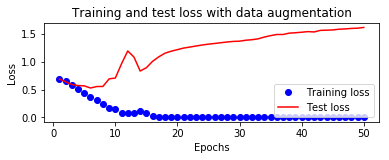

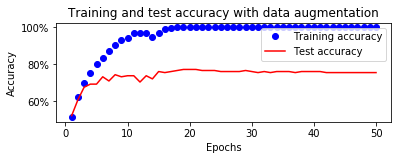

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)

import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Test loss')
plt.title('Training and test loss with data augmentation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['acc'], 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Test accuracy')
plt.title('Training and test accuracy with data augmentation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

The accuracy of this code is ~80%, which is better than the accuracy of 66% using just the given dataset (without data augmentation).

## Transfer Learning

In the previous chapter, we learned about recognizing the class that an image belongs to in a given image. In this chapter, we will learn about one of the drawbacks of CNN and also about how we can overcome it using certain pre-trained models.

In this chapter, we will cover the following recipes:

* Gender classification of a person in an image using CNNs
* Gender classification of a person in image using the VGG16 architecture-based model
* Visualizing the output of the intermediate layers of a neural network
* Gender classification of a person in image using the VGG19 architecture-based model
* Gender classification of a using the ResNet architecture-based model
* Gender classification of a using the inception architecture-based model
* Detecting the key points within image of a face

## Gender classification of the person in an image using CNNs

To understand some of the limitations of CNNs, let's go through an example where we try to identify whether the given image contains the image of a cat or a dog.

We will gain an intuition of how a CNN predicts the class of object present in the image through the following steps:

* A convolution filter is activated by certain parts of the image:
    * For example, certain filters might activate if the image has a certain pattern—it contains a circular structure, for example
* A pooling layer ensures that image translation is taken care of:
    * This ensures that even if an image is big, over an increased number of pooling operations, the size of the image becomes small and the object can then be detected as the object is now expected to be in the smaller portion of the image (as it is pooled multiple times)
* The final flatten layer flattens all the patterns that are extracted by various convolution and pooling operations

Let's impose a scenario where the number of images in a training dataset is small. In such a case, the model does not have enough data points for it to generalize on a test dataset.

Additionally, given that the convolutions are learning various features from scratch, it could potentially take many epochs before the model starts to fit on top of the training dataset if the training dataset contains images that have a large shape (width and height).

Hence, in the next section, we will code the following scenario of building a CNN, where there are a few images (~1,700 images) and test the accuracy on different shapes of images:

* Accuracy in 10 epochs where the image size is 300 X 300
* Accuracy in 10 epochs where the image size is 50 X 50

In this section, we will fetch a dataset and perform classification analysis where the image size in one scenario is 300 x 300, while in the other scenario, it is 50 x 50. 

(Please refer to Transfer_learning.ipynb file in GitHub while implementing the code.)

### Scenario 1 – big images

Fetch the dataset. 

For this analysis, we will continue with the male versus female classification dataset that we have downloaded in the Gender classification case study in Chapter 4, Building a Deep Convolutional Neural Network:

In [0]:
with open('genderx.pkl', 'rb') as f:
...   x = pickle.load(f)

In [0]:
with open('gendery.pkl', 'rb') as f:
...   y = pickle.load(f)

In [0]:
x2 = []
y2 = []
for i in range(len(x)):
  x2.append(x[i])
  img_label = np.where(y[i]=="male",1,0)
  y2.append(img_label)

In the preceding step, we are looping through all the images (one at a time), reading the image into an array (we could have gotten away without this step in this iteration. 

However, in the next scenario of resizing the image, we will resize images in this step). Additionally, we are storing the labels of each image.

Prepare the input array so that it can be passed to a CNN. Additionally, prepare the output array:

In [0]:
x2 = np.array(x2)
x2 = x2.reshape(x2.shape[0],x2.shape[1],x2.shape[2],3)

Here, we are converting the list of arrays into a numpy array so that it can then be passed to the neural network.

Scale the input array and create input and output arrays:

In [0]:
X = np.array(x2)/255
Y = np.array(y2)

Create train and test datasets:

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=42)

Define the model and compile it:

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.optimizers import SGD
from keras import backend as K

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',input_shape=(300,300,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 298, 298, 64)      1792      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 149, 149, 64)      0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 149, 149, 128)     73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 74, 74, 128)       0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 74, 74, 256)       295168    
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 37, 37, 256)       0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 37, 37, 512)       1180160   
__________

In the preceding code, we are building a model that has multiple layers of convolution, pooling, and dropout. 

Furthermore, we are passing the output of final dropout through a flattening layer and then connecting the flattened output to a 512 node hidden layer before connecting the hidden layer to the output layer.

In the following code, we are compiling the model to reduce binary cross entropy loss, as follows:

In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
history = model.fit(X_train, y_train, batch_size=32,epochs=10,verbose=1,validation_data = (X_test, y_test))

Train on 1581 samples, validate on 176 samples
Epoch 1/10
1581/1581 [==============================] - 41s 26ms/step - loss: 7.7418 - acc: 0.5079 - val_loss: 7.9675 - val_acc: 0.5057
Epoch 2/10
1581/1581 [==============================] - 31s 20ms/step - loss: 7.8501 - acc: 0.5130 - val_loss: 7.9675 - val_acc: 0.5057
Epoch 3/10
1581/1581 [==============================] - 31s 20ms/step - loss: 7.8501 - acc: 0.5130 - val_loss: 7.9675 - val_acc: 0.5057
Epoch 4/10
1581/1581 [==============================] - 31s 20ms/step - loss: 7.8501 - acc: 0.5130 - val_loss: 7.9675 - val_acc: 0.5057
Epoch 5/10
1581/1581 [==============================] - 31s 20ms/step - loss: 7.8501 - acc: 0.5130 - val_loss: 7.9675 - val_acc: 0.5057
Epoch 6/10
1581/1581 [==============================] - 31s 20ms/step - loss: 7.8501 - acc: 0.5130 - val_loss: 7.9675 - val_acc: 0.5057
Epoch 7/10
1581/1581 [==============================] - 31s 20ms/step - loss: 7.8501 - acc: 0.5130 - val_loss: 7.9675 - val_acc: 0.5057
E

In the preceding step, you can see that the model does not train over increasing epochs, as shown in the following graph (the code for this diagram is the same as we saw in the Scaling input data section in Chapter 2, Building a Deep Feedforward Neural Network, and it can be found in the GitHub repository of this chapter):

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


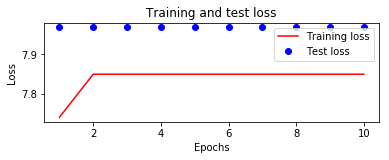

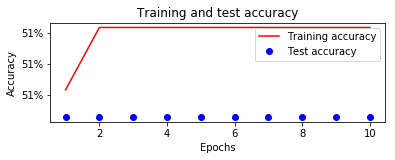

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)

plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'bo', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['acc'], 'r', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'bo', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

In the preceding graph, you can see that the model hardly learned anything, as the loss did not vary much. Also, the accuracy was stuck near the 51% mark (which is roughly the distribution of male versus female images in the original dataset).

## Scenario 2 – smaller images

In this scenario, we will modify the following in the model:

* Input image size:
    * We will reduce the size from 300 X 300 to 50 X 50
* Model architecture:
    * The structure of the architecture remains the same as what we saw in Scenario 1 – big images

Create a dataset with the input of the reduced image size (50 X 50 X 3) and output labels. For this, we will continue from step 4 of Scenario 1:

In [0]:
import cv2
x2 = []
y2 = []
for i in range(len(x)):
  img = cv2.resize(x[i],(50,50))
  x2.append(img)
  img_label = np.where(y[i]=="male",1,0)
  y2.append(img_label)

In [0]:
x2 = np.array(x2)
x2 = x2.reshape(x2.shape[0],x2.shape[1],x2.shape[2],3)
X = np.array(x2)/255
Y = np.array(y2)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=42)

In [0]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 48, 48, 64)        1792      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 6, 6, 512)         1180160   
__________

In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
history = model.fit(X_train, y_train, batch_size=32,epochs=10,verbose=1,validation_data = (X_test, y_test))

Train on 1581 samples, validate on 176 samples
Epoch 1/10
1581/1581 [==============================] - 4s 2ms/step - loss: 0.6918 - acc: 0.5269 - val_loss: 0.6662 - val_acc: 0.6761
Epoch 2/10
1581/1581 [==============================] - 2s 977us/step - loss: 0.6794 - acc: 0.5693 - val_loss: 0.6238 - val_acc: 0.6705
Epoch 3/10
1581/1581 [==============================] - 2s 974us/step - loss: 0.6201 - acc: 0.6477 - val_loss: 0.6175 - val_acc: 0.6818
Epoch 4/10
1581/1581 [==============================] - 2s 970us/step - loss: 0.5602 - acc: 0.7021 - val_loss: 0.5756 - val_acc: 0.6705
Epoch 5/10
1581/1581 [==============================] - 2s 975us/step - loss: 0.5326 - acc: 0.7274 - val_loss: 0.5399 - val_acc: 0.7273
Epoch 6/10
1581/1581 [==============================] - 2s 976us/step - loss: 0.4570 - acc: 0.7786 - val_loss: 0.5122 - val_acc: 0.7386
Epoch 7/10
1581/1581 [==============================] - 2s 978us/step - loss: 0.4089 - acc: 0.8046 - val_loss: 0.5507 - val_acc: 0.7330
Epo

The accuracy and loss of the model training across train and test datasets over increasing epochs is as follows:

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


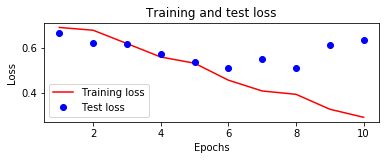

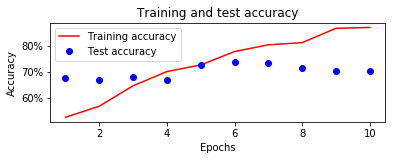

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)

plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'bo', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['acc'], 'r', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'bo', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

Note that, while the accuracy increased and the loss decreased steadily in both the training and test datasets initially, over increasing epochs, the model started to overfit (specialize) on training data and had an accuracy of ~76% on the test dataset.

From this, we can see that the CNN works when the input size is small and thus the filters had to learn from a smaller portion of the image. 

However, as, the image size increased, the CNN had a tough time learning.

Given that we have discovered that the image size has an impact on model accuracy, in the new scenario, let's use aggressive pooling to ensure that the bigger image (300 x 300 shape) reduces to a smaller one quickly.

## Scenario 3 – aggressive pooling on big images

In the following code, we will retain the analysis we have done until step 6 in Scenario 1. 

However, the only change will be the model architecture; in the following model architecture, we have more aggressive pooling than what we used in Scenario 1.

In the following architecture, having a bigger window of pooling in each layer ensures that we capture the activations in a larger area compared to the scenario of having lower pool sizes. 

The architecture of the model is as follows:

In [0]:
with open('genderx.pkl', 'rb') as f:
...   x = pickle.load(f)
with open('gendery.pkl', 'rb') as f:
...   y = pickle.load(f)


In [0]:
x2 = []
y2 = []
for i in range(len(x)):
  x2.append(x[i])
  img_label = np.where(y[i]=="male",1,0)
  y2.append(img_label)
  


In [0]:
x2 = np.array(x2)
x2 = x2.reshape(x2.shape[0],x2.shape[1],x2.shape[2],3)

In [0]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',input_shape=(300,300,3)))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 298, 298, 64)      1792      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 99, 99, 128)       73856     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 33, 33, 128)       0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 33, 33, 256)       295168    
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 11, 11, 256)       0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 11, 11, 512)       1180160   
__________

In the following code, we will retain the analysis we have done until step 6 in Scenario 1. 

However, the only change will be the model architecture; in the following model architecture, we have more aggressive pooling than what we used in Scenario 1.

In the following architecture, having a bigger window of pooling in each layer ensures that we capture the activations in a larger area compared to the scenario of having lower pool sizes. 

The architecture of the model is as follows:

In the following code, we will retain the analysis we have done until step 6 in Scenario 1. 

However, the only change will be the model architecture; in the following model architecture, we have more aggressive pooling than what we used in Scenario 1.

In the following architecture, having a bigger window of pooling in each layer ensures that we capture the activations in a larger area compared to the scenario of having lower pool sizes. 

The architecture of the model is as follows:

In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [0]:
X = np.array(x2)/255
Y = np.array(y2)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=42)

In [0]:
history = model.fit(X_train, y_train, batch_size=32,epochs=10,verbose=1,validation_data = (X_test, y_test))

Train on 1581 samples, validate on 176 samples
Epoch 1/10
1581/1581 [==============================] - 19s 12ms/step - loss: 0.7188 - acc: 0.5193 - val_loss: 0.6840 - val_acc: 0.5057
Epoch 2/10
1581/1581 [==============================] - 14s 9ms/step - loss: 0.6909 - acc: 0.5281 - val_loss: 0.6903 - val_acc: 0.6250
Epoch 3/10
1581/1581 [==============================] - 14s 9ms/step - loss: 0.6782 - acc: 0.5863 - val_loss: 0.6284 - val_acc: 0.6761
Epoch 4/10
1581/1581 [==============================] - 14s 9ms/step - loss: 0.6325 - acc: 0.6376 - val_loss: 0.6271 - val_acc: 0.6364
Epoch 5/10
1581/1581 [==============================] - 14s 9ms/step - loss: 0.6094 - acc: 0.6622 - val_loss: 0.5888 - val_acc: 0.7045
Epoch 6/10
1581/1581 [==============================] - 14s 9ms/step - loss: 0.5811 - acc: 0.6913 - val_loss: 0.6321 - val_acc: 0.6591
Epoch 7/10
1581/1581 [==============================] - 14s 9ms/step - loss: 0.5457 - acc: 0.7217 - val_loss: 0.6312 - val_acc: 0.6534
Epoch 8

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


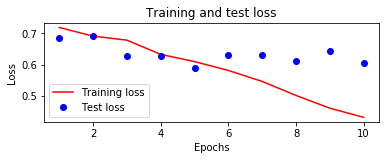

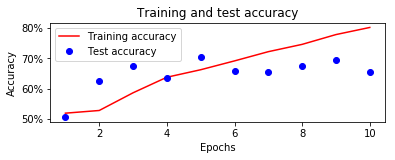

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)

plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'bo', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['acc'], 'r', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'bo', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

We can see that the test data has ~70% accuracy in correctly classifying gender in images.

However, you can see that there is a considerable amount of overfitting on top of the training dataset (as the loss decreases steadily on the training dataset, while not on the test dataset).

## Gender classification of the person in image using the VGG16 architecture-based model

In the previous section on gender classification using CNN, we saw that when we build a CNN model from scratch, we could encounter some of the following scenarios:

* The number of images that were passed is not sufficient for the model to learn
* Convolutions might not be learning all the features in our images when the images are big in size

The first problem could be tackled by performing our analysis on a large dataset. 

The second one could be tackled by training a larger network on the larger dataset for a longer number of epochs.

However, while we are able to perform all of this, more often than not, we do not have the amount of data that is needed to perform such an analysis. 

Transfer learning using pre-trained models comes to the rescue in such scenarios.

ImageNet is a popular competition where participants are asked to predict the various classes of an image, where the images are of various sizes and also contain multiple classes of objects.

There were multiple research teams that competed in this competition to come up with a model that is able to predict images of multiple classes where there are millions of images in a dataset. 

Given that there were millions of images, the first problem of a limited dataset is resolved.

Additionally, given the huge networks the research teams have built, the problem of coming up with convolutions that learn a variety of features is also resolved.

Hence, we are in a position to reuse the convolutions that were built on a different dataset, where the convolutions are learning to predict the various features in an image and then pass them through a hidden layer so that we can predict the class of an image for our specific dataset. 

There are multiple pre-trained models that were developed by different groups. We will go through VGG16 here.

In this section, let's try to understand how we can leverage the VGG16 pre-trained network for our gender classification exercise.

The VGG16 model's architecture is as follows:

With this strategy in place, let's code up our solution as follows (Please refer to Transfer_learning.ipynb file in GitHub while implementing the code):

Import the pre-trained model:

In [0]:
from keras.applications import vgg16
from keras.utils.vis_utils import plot_model
from keras.applications.vgg16 import preprocess_input
vgg16_model = vgg16.VGG16(include_top=False, weights='imagenet',input_shape=(300,300,3))

58892288/58889256 [==============================] - 1s 0us/step


Note that we are excluding the last layer in the VGG16 model. 

This is to ensure that we fine-tune the VGG16 model for the problem that we are trying solve. 

Additionally, given that our input image shape is 300 X 300 X 3, we are specifying the same while downloading the VGG16 model.

Preprocess the set of images. 

This preprocessing step ensures that the images are processed in a manner that the pre-trained model can take as input. 

For example, in the following code, we are performing preprocessing for one of the images, named img:

In [0]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 300, 300, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0         
__________

We are preprocessing the image as per the preprocessing requirement in VGG16 using the preprocess_input method.

Create the input and output datasets. 

For this exercise, we will continue from the end of step 3 in Scenario 1 of Gender classification using CNN. 

Here, the process of creating input and output datasets remains the same as what we have already done, with a minor modification of extracting features using the VGG16 model.

We will pass each image through vgg16_model so that we take the output of vgg16_model as the processed input. Additionally, we will be performing the preprocessing on top of the input as follows:

In [0]:
import cv2
x2_vgg16 = []
for i in range(len(x)):
    if(i%100 == 0):
      print(i)
    img = x[i]
    img = preprocess_input(img.reshape(1,300,300,3))
    img_new = vgg16_model.predict(img.reshape(1,300,300,3))
    x2_vgg16.append(img_new)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700


Now, we pass the pre-processed input to the VGG16 model to extract features, as follows:

In [0]:
x2_vgg16 = np.array(x2_vgg16)
x2_vgg16.shape

(1757, 1, 9, 9, 512)

In the preceding code, in addition to passing the image through VGG16 model, we have also stored the input values in a list.

Convert the input and output to NumPy arrays and create training and test datasets:

In [0]:
x2_vgg16= x2_vgg16.reshape(x2_vgg16.shape[0],x2_vgg16.shape[2],x2_vgg16.shape[3],x2_vgg16.shape[4])
x2_vgg16.shape

IndexError: ignored

In [0]:
Y = np.array(y2)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x2_vgg16,Y, test_size=0.1, random_state=42)

In [0]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1581, 9, 9, 512) (176, 9, 9, 512) (1581,) (176,)


In [0]:
np.max(X_train)

691.8679

In [0]:
model_vgg16 = Sequential()
model_vgg16.add(Conv2D(512, kernel_size=(3, 3), activation='relu',input_shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3])))
model_vgg16.add(MaxPooling2D(pool_size=(2, 2)))
model_vgg16.add(Flatten())
model_vgg16.add(Dense(512, activation='relu'))
model_vgg16.add(Dropout(0.5))
model_vgg16.add(Dense(1, activation='sigmoid'))
model_vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 7, 7, 512)         2359808   
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 3, 3, 512)         0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 4608)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               2359808   
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 513       
Total params: 4,720,129
Trainable params: 4,720,129
Non-trainable params: 0
_________________________________________________________________


Notice that the model's architecture is very similar to the model that we trained in the Gender classification using CNNs section. 

The major difference is that this model is deeper (more hidden layers). Additionally, the weights of the VGG16 network are obtained by training on millions of images.

We'll ensure that the VGG16 weights are frozen from updating while training our model to classify gender in an image. 

The output of passing an image in the gender classification exercise (which is of 300 x 300 x 3 in shape) is 9 x 9 x 512 in shape.

We shall keep the weights as they were in the original network, extract the 9 x 9 x 512 output, pass it through another convolution pooling operation, flatten it, connect it to a hidden layer, and then pass it through the sigmoid activation to determine whether the image is of a male or a female.

Essentially, by using the convolution and pooling layers of the VGG16 model, we are using the filters that were trained on a much bigger dataset. 

Ultimately, we will be fine-tuning the output of these convolution and pooling layers for the objects that we are trying to predict.

In [0]:
model_vgg16.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
np.mean(y_train)

0.48703352308665404

In [0]:
history_vgg16 = model_vgg16.fit(X_train/np.max(X_train), y_train, batch_size=16,epochs=10,verbose=1,validation_data = (X_test/np.max(X_train), y_test))

Train on 1581 samples, validate on 176 samples
Epoch 1/10
1581/1581 [==============================] - 5s 3ms/step - loss: 0.3550 - acc: 0.8438 - val_loss: 0.1934 - val_acc: 0.9091
Epoch 2/10
1581/1581 [==============================] - 2s 1ms/step - loss: 0.1317 - acc: 0.9557 - val_loss: 0.2199 - val_acc: 0.9261
Epoch 3/10
1581/1581 [==============================] - 2s 1ms/step - loss: 0.0525 - acc: 0.9855 - val_loss: 0.2927 - val_acc: 0.9034
Epoch 4/10
1581/1581 [==============================] - 2s 1ms/step - loss: 0.0211 - acc: 0.9949 - val_loss: 0.2838 - val_acc: 0.9034
Epoch 5/10
1581/1581 [==============================] - 2s 1ms/step - loss: 0.0066 - acc: 0.9987 - val_loss: 0.3831 - val_acc: 0.8977
Epoch 6/10
1581/1581 [==============================] - 2s 1ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.3315 - val_acc: 0.9148
Epoch 7/10
1581/1581 [==============================] - 2s 1ms/step - loss: 5.9209e-04 - acc: 1.0000 - val_loss: 0.3607 - val_acc: 0.9205
Epoch 8/10


Once we fit the model, we should see that we are able to attain an accuracy of ~89% on the test dataset in the first few epochs:

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


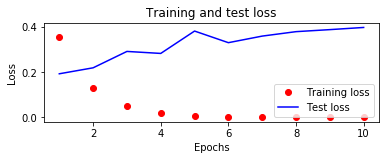

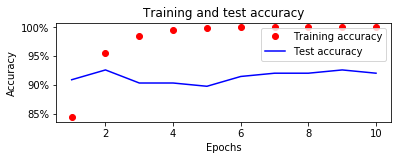

In [0]:
history_dict = history_vgg16.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)

plt.subplot(211)
plt.plot(epochs, history_vgg16.history['loss'], 'ro', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history_vgg16.history['acc'], 'ro', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

Contrast this with the models we built in the Gender classification using CNN section, where in any of the scenarios, we were not able to reach 80% accuracy in classification in 10 epochs.

A sample of some of the images where the model mis-classified is as follows:

Note that, in the preceding picture, the model potentially mis-classified when the input image is either a part of a face or if the object in the image occupies a much smaller portion of the total image or potentially, if the label was provided incorrectly.

In [0]:
y_pred = model_vgg16.predict(X_test/np.max(X_train))
y_pred.shape

(176, 1)

In [0]:
np.abs(y_pred.flatten()-y_test)[27]

0.7937296628952026

In [0]:
np.argsort(np.abs(y_pred.flatten()-y_test))

array([  0,  39,  43,  46,  51,  56,  67,  76,  77,  84,  85,  88,  89,
       103, 104, 106, 108, 118, 173, 171, 168, 164, 158, 156,  38, 152,
       142, 132, 126, 124, 121, 120, 150,  35,  87,   8,  17,  18,   6,
         2,   4, 143,  81,  78,  47, 136,   5, 175,  45, 114,  93,  31,
       166,  69,  90, 144, 172,  61,  99, 162,  57, 123,  22, 148, 153,
       139,  23,  65,  20,   9,  71, 141,  92,  79, 130,   7, 116, 119,
       154, 151,  60,  91, 161,  41,  25,  80,  14, 157,  30,  49, 112,
       160,  98,  73,  64, 122, 147,  24, 146, 174, 115,  48,  55,  50,
        66,  15,  54,  72,  83, 145,  28,  42,  75,  53, 100,  74, 137,
        70, 117, 138,  12, 102,  36,  16,  40,  10,  21, 109,  96, 170,
        62,  52,  37,  34,  86, 113, 127, 165, 135, 163, 107,  13, 149,
        19, 105,  26,  29,  95, 155, 140,  11, 131,  32,  63,   3,  68,
        59, 129, 111, 169, 133,  82,  97, 167, 110,  94,  27,   1, 125,
       101,  44,  58, 128,  33, 134, 159])

In [0]:
y_pred2 = np.where(y_pred>0.5,1,0)

In [0]:
from sklearn.model_selection import train_test_split
img_train, img_test, y_train, y_test = train_test_split(x,Y, test_size=0.1, random_state=42)

In [0]:
y_test_char = np.where(y_test==0,'F','M')

In [0]:
y_pred_char = np.where(y_pred>0.5,'M','F')

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


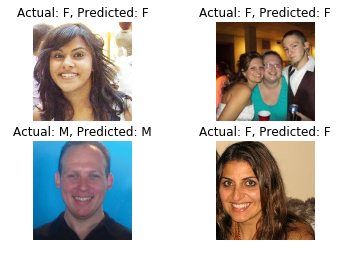

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(221)
plt.imshow(img_test[85])
plt.title('Actual: '+str(y_test_char[85])+', '+'Predicted: '+str((y_pred_char[85][0])))
plt.grid('off')
plt.axis('off')
plt.subplot(222)
plt.title('Actual: '+str(y_test_char[32])+', '+'Predicted: '+str((y_pred_char[32][0])))
plt.imshow(img_test[32])
plt.grid('off')
plt.axis('off')
plt.subplot(223)
plt.title('Actual: '+str(y_test_char[83])+', '+'Predicted: '+str((y_pred_char[83][0])))
plt.imshow(img_test[83])
plt.grid('off')
plt.axis('off')
plt.subplot(224)
plt.title('Actual: '+str(y_test_char[46])+', '+'Predicted: '+str((y_pred_char[46][0])))
plt.imshow(img_test[46])
plt.grid('off')
plt.axis('off')
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


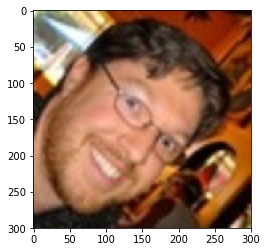

In [0]:
plt.imshow(x[3])
plt.grid('off')

In [0]:
from keras.applications.vgg16 import preprocess_input
model_vgg16.predict(vgg16_model.predict(preprocess_input(x[3].reshape(1,300,300,3)))/np.max(X_train))
from keras import models
activation_model = models.Model(inputs=vgg16_model.input,outputs=vgg16_model.layers[1].output)
activations = activation_model.predict(preprocess_input(x[3].reshape(1,300,300,3)))

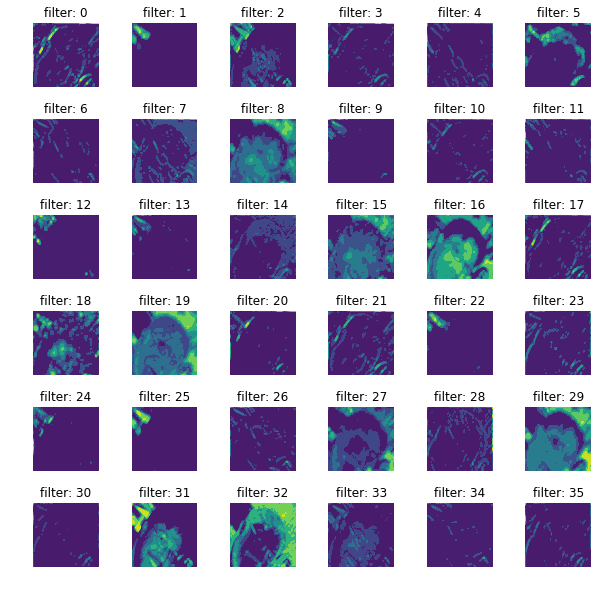

In [0]:
fig, axs = plt.subplots(6, 6, figsize=(10, 10))
fig.subplots_adjust(hspace = .5, wspace=.5)
first_layer_activation = activations[0]
for i in range(6):
  for j in range(6):
    try:
      axs[i,j].set_ylim((224, 0))
      axs[i,j].contourf(first_layer_activation[:,:,((6*i)+j)],6,cmap='viridis')
      axs[i,j].set_title('filter: '+str((6*i)+j))
      axs[i,j].axis('off')
    except:
      continue

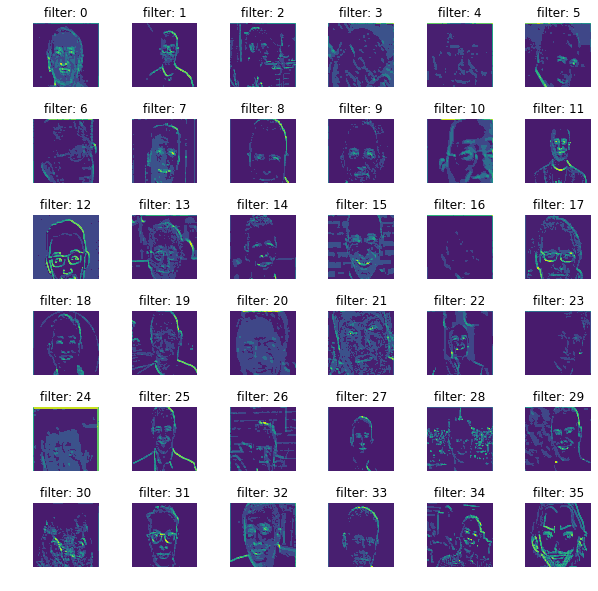

In [0]:
activation_model = models.Model(inputs=vgg16_model.input,outputs=vgg16_model.layers[1].output)
activations = activation_model.predict(preprocess_input(np.array(x[:36]).reshape(36,300,300,3)))
fig, axs = plt.subplots(6, 6, figsize=(10, 10))
fig.subplots_adjust(hspace = .5, wspace=.5)
first_layer_activation = activations
for i in range(6):
  for j in range(6):
    try:
      axs[i,j].set_ylim((224, 0))
      axs[i,j].contourf(first_layer_activation[((6*i)+j),:,:,7],6,cmap='viridis')
      axs[i,j].set_title('filter: '+str((6*i)+j))
      axs[i,j].axis('off')
    except:
      continue

In [0]:
for i, layer in enumerate(model.layers):
     print(i, layer.name)

0 conv2d_39
1 max_pooling2d_24
2 conv2d_40
3 max_pooling2d_25
4 conv2d_41
5 max_pooling2d_26
6 conv2d_42
7 flatten_10
8 dense_16
9 dense_17


In [0]:
activation_model = models.Model(inputs=vgg16_model.input,outputs=vgg16_model.layers[-1].output)
activations = activation_model.predict(preprocess_input(x[3].reshape(1,300,300,3)))

## Gender classification of the person in image using the VGG19 architecture-based model

In the previous section, we learned about how VGG16 works. VGG19 is an improved version of VGG16, with a greater number of convolution and pooling operations.

In [0]:
from keras.applications import vgg19
from keras.utils.vis_utils import plot_model
from keras.applications.vgg19 import preprocess_input
vgg19_model = vgg19.VGG19(include_top=False, weights='imagenet',input_shape=(300,300,3))

vgg19_model.summary()

80142336/80134624 [==============================] - 1s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 300, 300, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool

Note that the 16 and 19 in the VGG16 and VGG19 architectures stand for the number of layers in each of these networks. 

Once we extract the 9 x 9 x 512 output after we pass each image through the VGG19 network, that output will be the input for our model.

Additionally, the process of creating input and output datasets and then building, compiling, and fitting a model will remain the same as what we saw in the Gender classification using a VGG16 model-based architecture recipe.

In this section, we will code up the VGG19 pre-trained model, as follows (Please refer to Transfer_learning.ipynb file in GitHub while implementing the code):

Prepare the input and output data (we'll continue from step 3 in Scenario 1 of the Gender classification using CNN recipe):

In [0]:
import cv2
x2 = []
for i in range(len(x)):
    if(i%100 == 0):
      print(i)
    img = x[i]
    img = preprocess_input(img.reshape(1,300,300,3))
    img_new = vgg19_model.predict(img.reshape(1,300,300,3))
    x2.append(img_new)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700


In [0]:
x2 = np.array(x2)
x2.shape

(1757, 1, 9, 9, 512)

In [0]:
x2= x2.reshape(x2.shape[0],x2.shape[2],x2.shape[3],x2.shape[4])
x2.shape

(1757, 9, 9, 512)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x2,Y, test_size=0.1, random_state=42)

In [0]:
model_vgg19 = Sequential()
model_vgg19.add(Conv2D(512, kernel_size=(3, 3), activation='relu',input_shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3])))
model_vgg19.add(MaxPooling2D(pool_size=(2, 2)))
model_vgg19.add(Flatten())
model_vgg19.add(Dense(512, activation='relu'))
model_vgg19.add(Dropout(0.5))
model_vgg19.add(Dense(1, activation='sigmoid'))
model_vgg19.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 7, 7, 512)         2359808   
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 3, 3, 512)         0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 4608)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               2359808   
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 513       
Total params: 4,720,129
Trainable params: 4,720,129
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_vgg19.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
history_vgg19 = model_vgg19.fit(X_train/np.max(X_train), y_train, batch_size=16,epochs=10,verbose=1,validation_data = (X_test/np.max(X_train), y_test))

Train on 1581 samples, validate on 176 samples
Epoch 1/10
1581/1581 [==============================] - 5s 3ms/step - loss: 0.3600 - acc: 0.8444 - val_loss: 0.2260 - val_acc: 0.9148
Epoch 2/10
1581/1581 [==============================] - 2s 1ms/step - loss: 0.1358 - acc: 0.9488 - val_loss: 0.2112 - val_acc: 0.9148
Epoch 3/10
1581/1581 [==============================] - 2s 1ms/step - loss: 0.0452 - acc: 0.9867 - val_loss: 0.3236 - val_acc: 0.8807
Epoch 4/10
1581/1581 [==============================] - 2s 1ms/step - loss: 0.0151 - acc: 0.9981 - val_loss: 0.3233 - val_acc: 0.9148
Epoch 5/10
1581/1581 [==============================] - 2s 1ms/step - loss: 0.0051 - acc: 0.9994 - val_loss: 0.3754 - val_acc: 0.9091
Epoch 6/10
1581/1581 [==============================] - 2s 1ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.3916 - val_acc: 0.9148
Epoch 7/10
1581/1581 [==============================] - 2s 1ms/step - loss: 7.5149e-04 - acc: 1.0000 - val_loss: 0.4051 - val_acc: 0.9148
Epoch 8/10


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


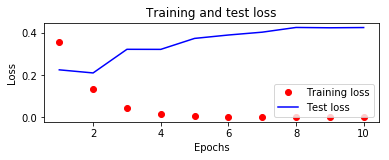

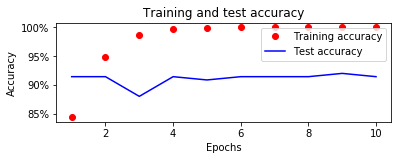

In [0]:
history_dict = history_vgg19.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)

plt.subplot(211)
plt.plot(epochs, history_vgg19.history['loss'], 'ro', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history_vgg19.history['acc'], 'ro', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

We should note that we were able to achieve ~89% accuracy on the test dataset when we used the VGG19 architecture, which is very similar to that of the VGG16 architecture.

A sample of mis-classified images is as follows:

Note that, VGG19 seems to mis-classify based on the space occupied by a person in an image. 

Additionally, it seems to give higher weightage to predict that a male with long hair is a female.

In [0]:
y_pred = model_vgg19.predict(X_test/np.max(X_train))

In [0]:
np.argsort(np.abs(y_pred.flatten() - y_test))

array([121,  39,  42, 120, 118, 112, 108, 142,  23, 104,  60,  20, 124,
       103,  67,  18, 123, 156,  78, 162,   8,  76,   4, 152,   6, 168,
       173, 126, 171, 106,  25,   9,  84,  85,  49,  30, 100,  62,  87,
       132,  17, 114,  56,  43,  31,  38,  73,  88,  50,  21,  51, 140,
       136,  77,  35,  61,   2,  93, 144,  69, 161, 148,  45,  46,  80,
       116, 145,  79, 150,  54, 138,  81, 141,  41,  92, 164,  72,  47,
        71, 160,  28, 175,  40, 143,  63,  57,   0,  90, 172,  98,  22,
        16, 139, 113,  66,   5, 111, 154,  24, 107,  48,  55,  99, 151,
       169,  65, 147,  68,  19,  36,  75,  14, 130,  13,   7, 105, 109,
        64, 166, 117,  11,  70,  89, 119,  94,  12,  83,  15,  96, 146,
        52,  86, 135,  32,  53, 131, 165, 153, 167,  10,  91, 115,  34,
        37,   3, 158, 102, 157,  29, 122,  97, 127,  95, 174,  58,  59,
       155,  26,  74,  82,  33, 170,   1, 137, 129, 149, 101, 163,  44,
       110, 125,  27, 133, 128, 134, 159])

In [0]:
y_pred_char = np.where(y_pred>0.5,'M','F')
y_test_char = np.where(y_test==0,'F','M')

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


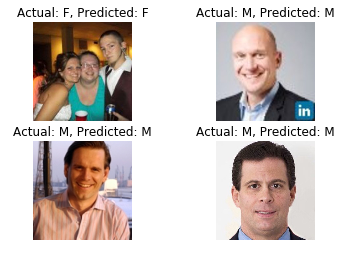

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(221)
plt.imshow(img_test[32])
plt.title('Actual: '+str(y_test_char[32])+', '+'Predicted: '+str((y_pred_char[32][0])))
plt.grid('off')
plt.axis('off')
plt.subplot(222)
plt.title('Actual: '+str(y_test_char[119])+', '+'Predicted: '+str((y_pred_char[119][0])))
plt.imshow(img_test[119])
plt.grid('off')
plt.axis('off')
plt.subplot(223)
plt.title('Actual: '+str(y_test_char[107])+', '+'Predicted: '+str((y_pred_char[107][0])))
plt.imshow(img_test[107])
plt.grid('off')
plt.axis('off')
plt.subplot(224)
plt.title('Actual: '+str(y_test_char[71])+', '+'Predicted: '+str((y_pred_char[71][0])))
plt.imshow(img_test[71])
plt.grid('off')
plt.axis('off')
plt.show()

## Gender classification using the Inception v3 architecture-based model

In the previous recipes, we implemented gender classification based on the VGG16 and VGG19 architectures. 

In this section, we'll implement the classification using the Inception architecture.

An intuition of how inception model comes in handy, is as follows.

There will be images where the object occupies the majority of the image. 

Similarly, there will be images where the object occupies a small portion of the total image. 

If we have the same size of kernels in both scenario, we are making it difficult for the model to learn – some images might have objects that are small and others might have objects that are larger.

To address this problem, we will have filters of multiple sizes that operate at the same layer.

In such a scenario, the network essentially gets wide rather than getting deep, as follows:

In the preceding diagram, note that we are performing convolutions of multiple filters in a given layer. The inception v1 module has nine such modules stacked linearly, as follows:

Source: http://joelouismarino.github.io/images/blog_images/blog_googlenet_keras/googlenet_diagram.png

Note that this architecture is fairly deep as well as wide. 

This is likely to result in a vanishing gradient problem (as we saw in the case for batch normalization in Chapter 2, Building a Deep Feedforward Neural Network).

To get around the problem of a vanishing gradient, inception v1 has two auxiliary classifiers that stem out of the inception modules. 

The overall loss of inception based network tries to minimize is as follows:

total_loss = real_loss + 0.3 * aux_loss_1 + 0.3 * aux_loss_2

Note that auxiliary losses are used only during training and are ignored during the prediction process.

Inception v2 and v3 are improvements on top of the inception v1 architecture where in v2, the authors have performed optimizations on top of convolution operations to process images faster and in v3, the authors have added 7 x 7 convolutions on top of the existing convolutions so that they can be concatenated together.

The process in which we code up inception v3 is very similar to the way in which we built the VGG19 model-based classifier (Please refer to Transfer_learning.ipynb file in GitHub while implementing the code):

Download the pre-trained Inception model:

In [0]:
from keras.applications import inception_v3
from keras.applications.inception_v3 import preprocess_input
from keras.utils.vis_utils import plot_model
inception_model = inception_v3.InceptionV3(include_top=False, weights='imagenet',input_shape=(300,300,3))

inception_model.summary()

87916544/87910968 [==============================] - 1s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 300, 300, 3)  0                                            
__________________________________________________________________________________________________
conv2d_46 (Conv2D)              (None, 149, 149, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_25 (BatchNo (None, 149, 149, 32) 96          conv2d_46[0][0]                  
__________________________________________________________________________________________________
activation_25 (Activation)      (None, 149, 149, 32) 0           batch_normalization_25[0][0]     
____________________________________________

Note that we would need an input image that is at least 300 x 300 in shape for the inception v3 pre-trained model to work.

Create the input and output datasets (we'll continue from step 3 in Scenario 1 of the Gender classification using CNNs recipe):

In [0]:
import cv2
x2 = []
for i in range(len(x)):
    if(i%100 == 0):
      print(i)
    img = x[i]
    img = preprocess_input(img.reshape(1,300,300,3))
    img_new = inception_model.predict(img.reshape(1,300,300,3))
    x2.append(img_new)
	
x2 = np.array(x2)
x2.shape

x2= x2.reshape(x2.shape[0],x2.shape[2],x2.shape[3],x2.shape[4])
x2.shape

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x2,Y, test_size=0.1, random_state=42)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700


In [0]:
model_inception_v3 = Sequential()
model_inception_v3.add(Conv2D(512, kernel_size=(3, 3), activation='relu',input_shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3])))
model_inception_v3.add(MaxPooling2D(pool_size=(2, 2)))
model_inception_v3.add(Flatten())
model_inception_v3.add(Dense(512, activation='relu'))
model_inception_v3.add(Dropout(0.5))
model_inception_v3.add(Dense(1, activation='sigmoid'))
model_inception_v3.summary()

model_inception_v3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history_inception_v3 = model_inception_v3.fit(X_train/np.max(X_train), y_train, batch_size=16,epochs=10,verbose=1,validation_data = (X_test/np.max(X_train), y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_140 (Conv2D)          (None, 6, 6, 512)         9437696   
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 3, 3, 512)         0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 4608)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 512)               2359808   
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 513       
Total params: 11,798,017
Trainable params: 11,798,017
Non-trainable params: 0
________________________________________________________________

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


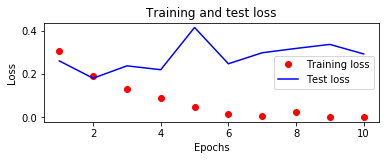

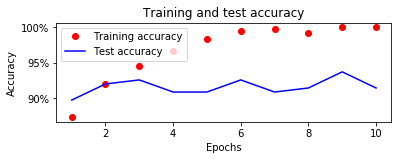

In [0]:
history_dict = history_inception_v3.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)

plt.subplot(211)
plt.plot(epochs, history_inception_v3.history['loss'], 'ro', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history_inception_v3.history['acc'], 'ro', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

You should notice that the accuracy in this scenario too is also ~90%.

## Gender classification of the person in image using the ResNet 50 architecture-based model

From VGG16 to VGG19, we have increased the number of layers and generally, the deeper the neural network, the better its accuracy. 

However, if merely increasing the number of layers is the trick, then we could keep on adding more layers (while taking care to avoid over-fitting) to the model to get a more accurate results.

Unfortunately, that does not turn out to be true and the issue of the vanishing gradient comes into the picture. 

As the number of layers increases, the gradient becomes so small as it traverses the network that it becomes hard to adjust the weights, and the network performance deteriorates.

ResNet comes into the picture to address this specific scenario.

Imagine a scenario where a convolution layer does nothing but pass the output of the previous layer to the next layer if the model has nothing to learn. 

However, if the model has to learn a few other features, the convolution layer takes the previous layer's output as input and learns the additional features that need to be learnt to perform classification.

The term residual is the additional feature that the model is expected to learn from one layer to the next layers.

A typical ResNet architecture looks as follows:

Source: https://arxiv.org/pdf/1512.03385.pdf

Note that we have skip connections that are connecting a previous layer to a layer down the line, along with the traditional convolution layers in this network.

Furthermore, the 50 in ResNet50 comes from the fact that we have a total of 50 layers in the network.

The ResNet50 architecture is built as follows (please refer to Transfer_learning.ipynb file in GitHub while implementing the code):

Download the pre-trained inception model:

In [0]:
import pickle
with open('genderx.pkl', 'rb') as f:
    x = pickle.load(f)
with open('gendery.pkl', 'rb') as f:
    y = pickle.load(f)

In [0]:
from keras.applications import resnet50
from keras.applications.resnet50 import preprocess_input
resnet50_model = resnet50.ResNet50(include_top=False, weights='imagenet',input_shape=(300,300,3))

resnet50_model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 300, 300, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 306, 306, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 150, 150, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 150, 150, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

Note that we need an input image that is at least 224 x 224 in shape for the ResNet50 pre-trained model to work.

Create the input and output datasets (we'll continue from step 3 in Scenario 1 of the Gender classification using CNNs recipe):

In [0]:
import cv2
x2 = []
for i in range(len(x)):
    if(i%100 == 0):
      print(i)
    img = x[i]
    img = preprocess_input(img.reshape(1,300,300,3))
    img_new = resnet50_model.predict(img.reshape(1,300,300,3))
    x2.append(img_new)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700


In [0]:
import numpy as np
x2 = np.array(x2)
x2.shape

(1757, 1, 10, 10, 2048)

In [0]:
x2= x2.reshape(x2.shape[0],x2.shape[2],x2.shape[3],x2.shape[4])
x2.shape

(1757, 10, 10, 2048)

In [0]:
y2 = []
for i in range(len(x)):
  img_label = np.where(y[i]=="male",1,0)
  y2.append(img_label)
Y = np.array(y2)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x2,Y, test_size=0.1, random_state=42)

In [0]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
model_resnet50 = Sequential()
model_resnet50.add(Conv2D(512, kernel_size=(3, 3), activation='relu',input_shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3])))
model_resnet50.add(MaxPooling2D(pool_size=(2, 2)))
model_resnet50.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model_resnet50.add(MaxPooling2D(pool_size=(2, 2)))
model_resnet50.add(Flatten())
model_resnet50.add(Dense(512, activation='relu'))
model_resnet50.add(Dropout(0.5))
model_resnet50.add(Dense(1, activation='sigmoid'))
model_resnet50.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 8, 8, 512)         9437696   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 512)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 512)         2359808   
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 512)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
___________________________

In [0]:
model_resnet50.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
np.max(X_train)

119.0767

In [0]:
history_resnet50 = model_resnet50.fit(X_train/np.max(X_train), y_train, batch_size=32,epochs=10,verbose=1,validation_data = (X_test/np.max(X_train), y_test))

Instructions for updating:
Use tf.cast instead.
Train on 1581 samples, validate on 176 samples
Epoch 1/10
1581/1581 [==============================] - 7s 4ms/step - loss: 0.2991 - acc: 0.8703 - val_loss: 0.1630 - val_acc: 0.9205
Epoch 2/10
1581/1581 [==============================] - 3s 2ms/step - loss: 0.1210 - acc: 0.9583 - val_loss: 0.1987 - val_acc: 0.9318
Epoch 3/10
1581/1581 [==============================] - 3s 2ms/step - loss: 0.0729 - acc: 0.9747 - val_loss: 0.2291 - val_acc: 0.9318
Epoch 4/10
1581/1581 [==============================] - 3s 2ms/step - loss: 0.0252 - acc: 0.9943 - val_loss: 0.3723 - val_acc: 0.9318
Epoch 5/10
1581/1581 [==============================] - 3s 2ms/step - loss: 0.0175 - acc: 0.9949 - val_loss: 0.3286 - val_acc: 0.9261
Epoch 6/10
1581/1581 [==============================] - 3s 2ms/step - loss: 0.0117 - acc: 0.9962 - val_loss: 0.3568 - val_acc: 0.9318
Epoch 7/10
1581/1581 [==============================] - 3s 2ms/step - loss: 0.0014 - acc: 0.9994 - va

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


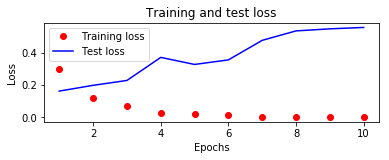

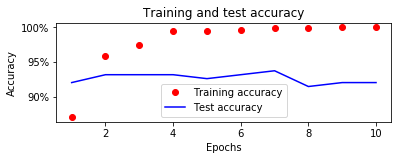

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history_resnet50.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)

plt.subplot(211)
plt.plot(epochs, history_resnet50.history['loss'], 'ro', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history_resnet50.history['acc'], 'ro', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

Note that the preceding model gives an accuracy of 92%.

There is no considerable difference in the accuracy levels of multiple pre-trained models on gender classification, as potentially they were trained to extract the general features, but not necessarily the features to classify gender.

## Visualizing the output intermediate layers

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


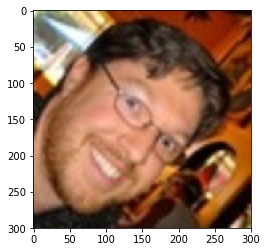

In [0]:
plt.imshow(x[3])
plt.grid('off')

In [0]:
np.max(X_train)

119.0767

In [0]:
from keras.applications import vgg16
from keras.utils.vis_utils import plot_model
from keras.applications.vgg16 import preprocess_input
vgg16_model = vgg16.VGG16(include_top=False, weights='imagenet',input_shape=(300,300,3))



In [0]:
model_vgg16 = Sequential()
model_vgg16.add(Conv2D(512, kernel_size=(3, 3), activation='relu',input_shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3])))
model_vgg16.add(MaxPooling2D(pool_size=(2, 2)))
model_vgg16.add(Flatten())
model_vgg16.add(Dense(512, activation='relu'))
model_vgg16.add(Dropout(0.5))
model_vgg16.add(Dense(1, activation='sigmoid'))
model_vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 8, 8, 512)         9437696   
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 512)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 513       
Total params: 13,633,025
Trainable params: 13,633,025
Non-trainable params: 0
________________________________________________________________

In [0]:
import cv2
x2_vgg16 = []
for i in range(len(x)):
    if(i%100 == 0):
      print(i)
    img = x[i]
    img = preprocess_input(img.reshape(1,300,300,3))
    img_new = vgg16_model.predict(img.reshape(1,300,300,3))
    x2_vgg16.append(img_new)

x2_vgg16 = np.array(x2_vgg16)
x2_vgg16.shape

x2_vgg16= x2_vgg16.reshape(x2_vgg16.shape[0],x2_vgg16.shape[2],x2_vgg16.shape[3],x2_vgg16.shape[4])
x2_vgg16.shape

Y = np.array(y2)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x2_vgg16,Y, test_size=0.1, random_state=42)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700


In [0]:


from keras.applications.vgg16 import preprocess_input
model_vgg16.predict(vgg16_model.predict(preprocess_input(x2_vgg16[3].reshape(1,300,300,3)))/np.max(X_train))

ValueError: ignored